In [62]:
import numpy as np
import pandas as pd

import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_squared_error

from xgboost import XGBRegressor

import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
frame = pd.read_csv(r'Predicting_Bike_Share_Demand_with_LSTM-master/hour.csv')
#frame = pd.read_csv(r'ausleihen_mit_wetter.csv')
df = pd.DataFrame(frame)

In [64]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [65]:
df = df.drop(columns=['hum','season','holiday','atemp'],axis=1)

In [66]:
df = df.drop(columns=['instant','dteday','casual','registered'],axis=1)

In [33]:
df.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


In [67]:
#Split Data
y = df['cnt']
X = df.drop('cnt',axis=1)

# Train-Test-Split
X_train , X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,shuffle=False, random_state=1)

In [35]:
X_train

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...
13898,3,1,8,7,0,2,1,2,0.70,0.6667,0.74,0.1343
13899,3,1,8,8,0,2,1,2,0.70,0.6515,0.70,0.1642
13900,3,1,8,9,0,2,1,2,0.70,0.6667,0.74,0.1343
13901,3,1,8,10,0,2,1,2,0.74,0.6970,0.70,0.1343


In [36]:
y_train

0         16
1         40
2         32
3         13
4          1
        ... 
13898    502
13899    705
13900    327
13901    250
13902    214
Name: cnt, Length: 13903, dtype: int64

In [68]:
#Scale X
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

In [69]:
# Training
model = XGBRegressor()
model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=6, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [39]:
y_pred = model.predict(X_test)

In [70]:
np.sqrt(np.mean((y_test - y_pred)**2))

66.90704089253153

In [71]:
y_train.describe()

count    13903.000000
mean       174.639143
std        166.955414
min          1.000000
25%         37.000000
50%        130.000000
75%        258.000000
max        957.000000
Name: cnt, dtype: float64

In [72]:
1 - (np.sum((y_test - y_pred)**2) / np.sum((y_test - y_test.mean())**2))

0.9079155564568613

In [43]:
# Plot
fig = px.scatter(
    x=y_pred,
    y=y_test,
    labels={'x':"Predicted", 'y':'Actual'},
    width=700,
    height=700
)

In [44]:
fig.show()

In [15]:
pred_y = pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred, 'Difference':y_test-y_pred})
pred_y[0:20]

,Actual Value,Predicted Value,Difference
15652,389,313.694397,75.305603
3085,146,166.166092,-20.166092
1684,152,117.657173,34.342827
10555,188,183.859344,4.140656
14622,62,156.582733,-94.582733
1915,133,112.050751,20.949249
13947,698,706.560791,-8.560791
227,155,168.919891,-13.919891
15950,357,319.868805,37.131195
3471,418,383.832092,34.167908


In [16]:
print(df.loc[4500:4505])

      yr  mnth  hr  weekday  workingday  weathersit  temp   hum  windspeed  \
4500   0     7  10        1           1           1  0.80  0.55     0.3582   
4501   0     7  11        1           1           1  0.82  0.56     0.2985   
4502   0     7  12        1           1           1  0.84  0.53     0.2836   
4503   0     7  13        1           1           1  0.86  0.50     0.2537   
4504   0     7  14        1           1           1  0.86  0.53     0.2836   
4505   0     7  15        1           1           1  0.86  0.56     0.4179   

      cnt  
4500  117  
4501  128  
4502  148  
4503  141  
4504  134  
4505  146  


In [17]:
df

,yr,mnth,hr,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,0,1,0,6,0,1,0.24,0.81,0.0000,16
1,0,1,1,6,0,1,0.22,0.80,0.0000,40
2,0,1,2,6,0,1,0.22,0.80,0.0000,32
3,0,1,3,6,0,1,0.24,0.75,0.0000,13
4,0,1,4,6,0,1,0.24,0.75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...
17374,1,12,19,1,1,2,0.26,0.60,0.1642,119
17375,1,12,20,1,1,2,0.26,0.60,0.1642,89
17376,1,12,21,1,1,1,0.26,0.60,0.1642,90
17377,1,12,22,1,1,1,0.26,0.56,0.1343,61


<AxesSubplot:>

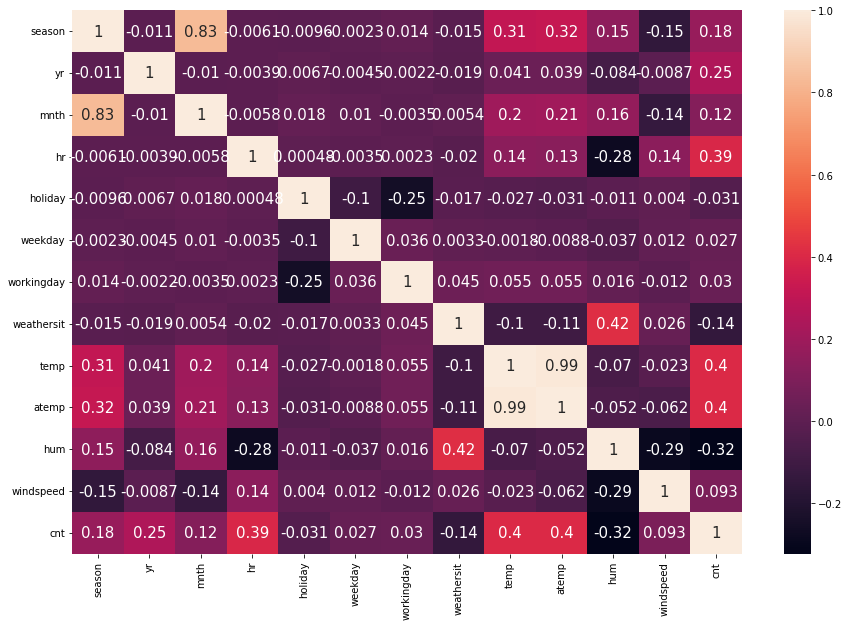

In [15]:
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, annot_kws={'size':15})

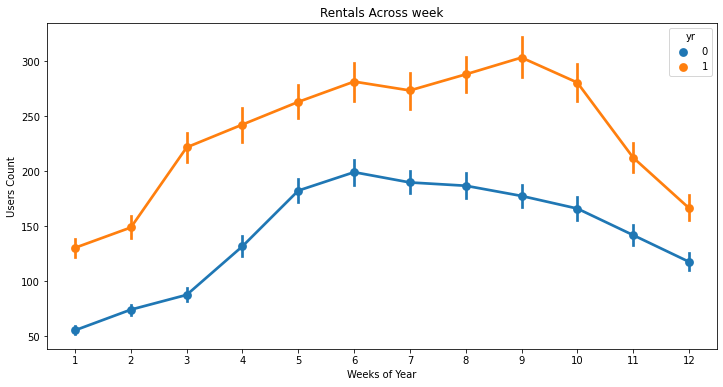

In [51]:
plt.figure(figsize=(12, 6))
sns.pointplot(x=df["mnth"], y=df["cnt"], hue=df["yr"])
plt.xlabel("Weeks of Year")
plt.ylabel("Users Count") 
plt.title("Rentals Across week")
plt.show()

In [53]:
def get_rmse(reg, model_name):
    """Print the score for the model passed in argument and retrun scores for the train/test sets"""
    
    y_train_pred, y_pred = reg.predict(X_train), reg.predict(X_test)
    rmse_train, rmse_test = np.sqrt(mean_squared_error(y_train, y_train_pred)), np.sqrt(mean_squared_error(y_test, y_pred))
    print(model_name, f'\t - RMSE on Training  = {rmse_train:.2f} / RMSE on Test = {rmse_test:.2f}')
    
    return rmse_train, rmse_test


In [75]:
rf = RandomForestRegressor(n_estimators=100).fit(X_train,y_train)
_, _ = get_rmse(rf, 'rondom forrest')

rondom forrest 	 - RMSE on Training  = 16.20 / RMSE on Test = 79.71


In [74]:
gb = GradientBoostingRegressor(n_estimators=100).fit(X_train, y_train)
_, _ = get_rmse(gb, 'gb')

gb 	 - RMSE on Training  = 64.20 / RMSE on Test = 108.54
